In [ ]:
import pandas as pd

In [ ]:
pwd

'C:\\Users\\Kvamleik\\Desktop\\MasterData'

In [ ]:
documents = pd.read_csv("/Users/Kvamleik/Desktop/MasterData//Preprocessed data/preprocessed_news_easyjet.csv")
documents.head()

,Unnamed: 0,Case,Date Published,Medium,Link,Headline,Paragraph No,Text,Attribute,Benefit,Personality,Attitude,index,Processed
0,0,EasyJet,2019-08-06,The Sun,https://www.thesun.co.uk/travel/9664051/easyje...,"SIT BACK, DON'T RELAX! Easyjet passenger pictu...",Paragraph 1,EASYJET has been slammed for asking a passenge...,NP,S,SI,NG,0,"['easyjet', 'slam', 'ask', 'passeng', 'photo',..."
1,1,EasyJet,2019-08-06,The Sun,https://www.thesun.co.uk/travel/9664051/easyje...,"SIT BACK, DON'T RELAX! Easyjet passenger pictu...",Paragraph 2,Images shared on social media showed a poor wo...,NP,S,SI,NG,1,"['imag', 'share', 'social', 'media', 'show', '..."
2,2,EasyJet,2019-08-06,The Sun,https://www.thesun.co.uk/travel/9664051/easyje...,"SIT BACK, DON'T RELAX! Easyjet passenger pictu...",Paragraph 3,"A caption accompanying the image said: ""#easyj...",P,F,C,NG,2,"['caption', 'accompani', 'imag', 'say', 'easyj..."
3,3,EasyJet,2019-08-06,The Sun,https://www.thesun.co.uk/travel/9664051/easyje...,"SIT BACK, DON'T RELAX! Easyjet passenger pictu...",Paragraph 4,The passenger who shared the image told Sun On...,P,F,C,NG,3,"['passeng', 'share', 'imag', 'tell', 'onlin', ..."
4,4,EasyJet,2019-08-06,The Sun,https://www.thesun.co.uk/travel/9664051/easyje...,"SIT BACK, DON'T RELAX! Easyjet passenger pictu...",Paragraph 5,"He explained: ""The flight attendant asked [the...",NP,S,SI,NG,4,"['explain', 'flight', 'attend', 'ask', 'woman'..."


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kvamleik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_docs = documents['Processed'].map(preprocess)

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
print(processed_docs[:1])

0    [easyjet, slam, passeng, photo, backless, seat...
Name: Processed, dtype: object


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(processed_docs, min_count=10, threshold=200) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[processed_docs], threshold=200)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See bigram and trigram example
print(trigram_mod[bigram_mod[processed_docs[0]]])

['easyjet', 'slam', 'passeng', 'photo', 'backless', 'seat', 'plan']


In [ ]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 backless
1 easyjet
2 passeng
3 photo
4 plan
5 seat
6 slam
7 chair
8 imag
9 media
10 perch


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[150]

print(bow_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [ ]:
bow_doc_150 = bow_corpus[150]

for i in range(len(bow_doc_150)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_150[i][0], 
                                                     dictionary[bow_doc_150[i][0]], 
                                                     bow_doc_150[i][1]))

Word 2 ("photo") appears 1 time.
Word 5 ("plane") appears 1 time.


In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [ ]:
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.33739437093295815),
 (1, 0.3944057788619136),
 (2, 0.7442189707496333),
 (3, 0.42041318204765793)]


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=5, workers=2, random_state=100)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.386*"seat" + 0.221*"passeng" + 0.184*"safeti" + 0.071*"flight" + 0.071*"airlin" + 0.047*"easyjet" + 0.006*"photo" + 0.005*"imag" + 0.004*"staff" + 0.004*"plane"
Topic: 1 
Words: 0.429*"seat" + 0.147*"flight" + 0.144*"plane" + 0.124*"photo" + 0.090*"passeng" + 0.045*"easyjet" + 0.007*"imag" + 0.006*"airlin" + 0.005*"staff" + 0.002*"safeti"
Topic: 2 
Words: 0.432*"airlin" + 0.266*"imag" + 0.176*"easyjet" + 0.051*"photo" + 0.035*"passeng" + 0.025*"seat" + 0.004*"flight" + 0.004*"staff" + 0.004*"safeti" + 0.004*"plane"
Topic: 3 
Words: 0.422*"flight" + 0.282*"passeng" + 0.131*"easyjet" + 0.125*"staff" + 0.020*"airlin" + 0.007*"plane" + 0.004*"seat" + 0.004*"imag" + 0.003*"safeti" + 0.003*"photo"
Topic: 4 
Words: 0.554*"easyjet" + 0.179*"safeti" + 0.072*"staff" + 0.071*"passeng" + 0.042*"flight" + 0.029*"photo" + 0.029*"seat" + 0.017*"plane" + 0.004*"imag" + 0.003*"airlin"


### Compute Model Perplexity and Coherence Score of first model 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -2.6684777245383797

Coherence Score:  0.3561779767744576


In [ ]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [ ]:
### Choosing the optimal model with the highest Coherence Value

In [ ]:
def compute_coherence_values(dictionary, bow_corpus, processed_docs, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=5, workers=2, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, bow_corpus=bow_corpus, processed_docs=processed_docs, start=2, limit=15, step=2)

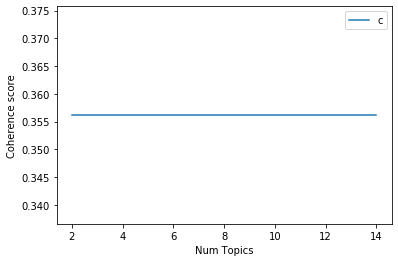

In [ ]:
import matplotlib.pyplot as plt
# Show graph
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3562
Num Topics = 4  has Coherence Value of 0.3562
Num Topics = 6  has Coherence Value of 0.3562
Num Topics = 8  has Coherence Value of 0.3562
Num Topics = 10  has Coherence Value of 0.3562
Num Topics = 12  has Coherence Value of 0.3562
Num Topics = 14  has Coherence Value of 0.3562


In [ ]:
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.276*"passeng" + 0.174*"airlin" + 0.154*"easyjet" + 0.150*"flight" + '
  '0.147*"safeti" + 0.057*"seat" + 0.014*"plane" + 0.011*"staff" + '
  '0.009*"photo" + 0.008*"imag"'),
 (1,
  '0.287*"seat" + 0.197*"easyjet" + 0.164*"flight" + 0.079*"photo" + '
  '0.071*"plane" + 0.069*"staff" + 0.066*"imag" + 0.049*"passeng" + '
  '0.013*"airlin" + 0.004*"safeti"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', optimal_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -2.716966200911191


In [ ]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=optimal_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Kvamleik\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
